Checking the 'train_dates.csv'

 - lots of columns (1157)
 - 80%+ missing values
 - Same stations often have same date values

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_date_part = pd.read_csv('../input/train_date.csv', nrows=10000)
print(train_date_part.shape)
print(1.0 * train_date_part.count().sum() / train_date_part.size)
print(train_date_part[:2])

(10000, 1157)
0.177920570441
   Id  L0_S0_D1  L0_S0_D3  L0_S0_D5  L0_S0_D7  L0_S0_D9  L0_S0_D11  L0_S0_D13  \
0   4     82.24     82.24     82.24     82.24     82.24      82.24      82.24   
1   6       NaN       NaN       NaN       NaN       NaN        NaN        NaN   

   L0_S0_D15  L0_S0_D17      ...       L3_S50_D4246  L3_S50_D4248  \
0      82.24      82.24      ...                NaN           NaN   
1        NaN        NaN      ...                NaN           NaN   

   L3_S50_D4250  L3_S50_D4252  L3_S50_D4254  L3_S51_D4255  L3_S51_D4257  \
0           NaN           NaN           NaN           NaN           NaN   
1           NaN           NaN           NaN           NaN           NaN   

   L3_S51_D4259  L3_S51_D4261  L3_S51_D4263  
0           NaN           NaN           NaN  
1           NaN           NaN           NaN  

[2 rows x 1157 columns]


In [2]:
# Let's check the min and max times for each station
def get_station_times(dates, withId=False):
    times = []
    cols = list(dates.columns)
    if 'Id' in cols:
        cols.remove('Id')
    for feature_name in cols:
        if withId:
            df = dates[['Id', feature_name]].copy()
            df.columns = ['Id', 'time']
        else:
            df = dates[[feature_name]].copy()
            df.columns = ['time']
        df['station'] = feature_name.split('_')[1][1:]
        df = df.dropna()
        times.append(df)
    return pd.concat(times)

station_times = get_station_times(train_date_part, withId=True).sort_values(by=['Id', 'station'])
print(station_times[:5])
print(station_times.shape)
min_station_times = station_times.groupby(['Id', 'station']).min()['time']
max_station_times = station_times.groupby(['Id', 'station']).max()['time']
print(np.mean(1. * (min_station_times == max_station_times)))

   Id   time station
0   4  82.24       0
0   4  82.24       0
0   4  82.24       0
0   4  82.24       0
0   4  82.24       0
(2048541, 3)
0.9821721580467314


We just removed the missing values. As the observation times are almost always unique for staion, Id pair we could spare a lot of memory by reading only one time for each station.

Please note we checked only 1% of the dataset!

In [3]:
# Read station times for train and test
date_cols = train_date_part.drop('Id', axis=1).count().reset_index().sort_values(by=0, ascending=False)
date_cols['station'] = date_cols['index'].apply(lambda s: s.split('_')[1])
date_cols = date_cols.drop_duplicates('station', keep='first')['index'].tolist()
print(date_cols) # selected features

train_date = pd.read_csv('../input/train_date.csv', usecols=date_cols)
print(train_date.shape)
train_station_times = get_station_times(train_date, withId=False)
print(train_station_times.shape)
train_time_cnt = train_station_times.groupby('time').count()[['station']].reset_index()
train_time_cnt.columns = ['time', 'cnt']
print(train_time_cnt.shape)

test_date = pd.read_csv('../input/test_date.csv', usecols=date_cols)
print(test_date.shape)
test_station_times = get_station_times(test_date, withId=False)
print(test_station_times.shape)
test_time_cnt = test_station_times.groupby('time').count()[['station']].reset_index()
test_time_cnt.columns = ['time', 'cnt']
print(test_time_cnt.shape)

['L3_S37_D3949', 'L3_S30_D3541', 'L3_S29_D3428', 'L3_S34_D3877', 'L3_S33_D3870', 'L0_S0_D3', 'L0_S1_D30', 'L0_S8_D145', 'L3_S36_D3919', 'L3_S35_D3910', 'L0_S5_D115', 'L0_S3_D70', 'L0_S6_D120', 'L0_S7_D143', 'L0_S2_D54', 'L0_S4_D106', 'L0_S12_D333', 'L0_S20_D465', 'L0_S13_D355', 'L0_S10_D266', 'L0_S11_D284', 'L0_S9_D192', 'L2_S26_D3084', 'L1_S24_D1828', 'L0_S19_D457', 'L0_S17_D432', 'L0_S14_D380', 'L0_S15_D401', 'L0_S16_D428', 'L2_S27_D3156', 'L0_S18_D447', 'L0_S21_D469', 'L0_S23_D629', 'L0_S22_D608', 'L3_S41_D4021', 'L3_S40_D3981', 'L3_S45_D4129', 'L3_S48_D4203', 'L3_S47_D4155', 'L3_S39_D3974', 'L3_S51_D4255', 'L1_S25_D1887', 'L3_S31_D3848', 'L3_S43_D4097', 'L3_S49_D4208', 'L3_S50_D4254', 'L3_S44_D4122', 'L3_S38_D3953', 'L3_S32_D3852', 'L2_S28_D3234', 'L3_S46_D4135', 'L3_S42_D4057']
(1183747, 52)
(14302781, 2)
(101341, 2)
(1183748, 52)
(14308197, 2)
(101265, 2)


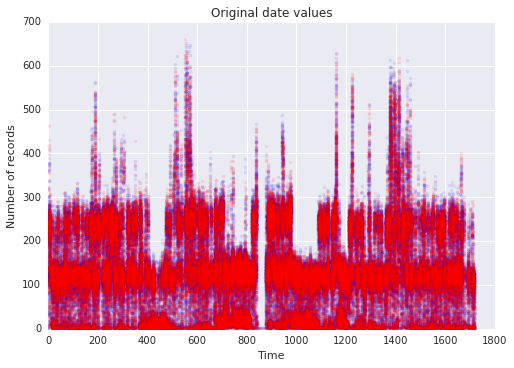

(0.0, 1718.48)
(0.0, 1718.49)


In [4]:
fig = plt.figure()
plt.plot(train_time_cnt['time'].values, train_time_cnt['cnt'].values, 'b.', alpha=0.1, label='train')
plt.plot(test_time_cnt['time'].values, test_time_cnt['cnt'].values, 'r.', alpha=0.1, label='test')
plt.title('Original date values')
plt.ylabel('Number of records')
plt.xlabel('Time')
fig.savefig('original_date_values.png', dpi=300)
plt.show()

print((train_time_cnt['time'].min(), train_time_cnt['time'].max()))
print((test_time_cnt['time'].min(), test_time_cnt['time'].max()))

A few observations:

 1. Train and test set has the same time period
 2. There is a clear periodic pattern 
 3. The dates are transformed to 0 - 1718 with granularity of 0.01
 4. There is a gap in the middle

Could we figure out what does 0.01 mean?  Let's check a few auto correlations!

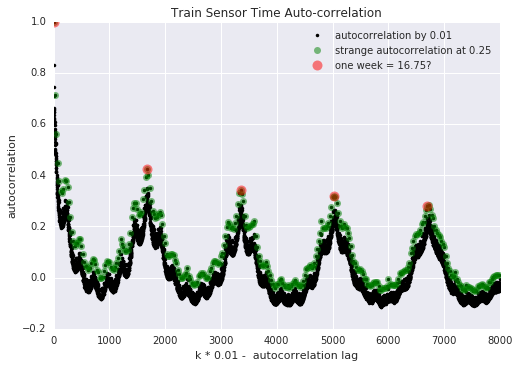

In [5]:
time_ticks = np.arange(train_time_cnt['time'].min(), train_time_cnt['time'].max() + 0.01, 0.01)
time_ticks = pd.DataFrame({'time': time_ticks})
time_ticks = pd.merge(time_ticks, train_time_cnt, how='left', on='time')
time_ticks = time_ticks.fillna(0)
# Autocorrelation
x = time_ticks['cnt'].values
max_lag = 8000
auto_corr_ks = range(1, max_lag)
auto_corr = np.array([1] + [np.corrcoef(x[:-k], x[k:])[0, 1] for k in auto_corr_ks])
fig = plt.figure()
plt.plot(auto_corr, 'k.', label='autocorrelation by 0.01')
plt.title('Train Sensor Time Auto-correlation')
period = 25
auto_corr_ks = list(range(period, max_lag, period))
auto_corr = np.array([1] + [np.corrcoef(x[:-k], x[k:])[0, 1] for k in auto_corr_ks])
plt.plot([0] + auto_corr_ks, auto_corr, 'go', alpha=0.5, label='strange autocorrelation at 0.25')
period = 1675
auto_corr_ks = list(range(period, max_lag, period))
auto_corr = np.array([1] + [np.corrcoef(x[:-k], x[k:])[0, 1] for k in auto_corr_ks])
plt.plot([0] + auto_corr_ks, auto_corr, 'ro', markersize=10, alpha=0.5, label='one week = 16.75?')
plt.xlabel('k * 0.01 -  autocorrelation lag')
plt.ylabel('autocorrelation')
plt.legend(loc=0)
fig.savefig('train_time_auto_correlation.png', dpi=300)

The largest peaks are at approximately 1680 ticks.  Let's call it a week ;) 

In each week we could see 7 local maxima ~ days.


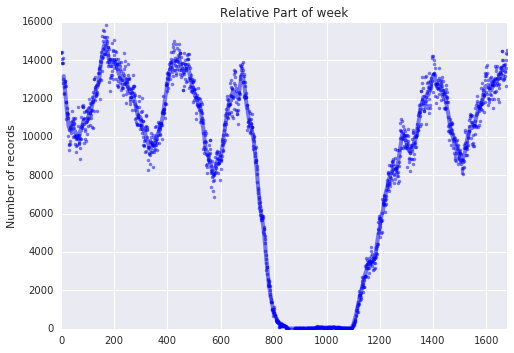

In [6]:
week_duration = 1679
train_time_cnt['week_part'] = ((train_time_cnt['time'].values * 100) % week_duration).astype(np.int64)
# Aggregate weekly stats
train_week_part = train_time_cnt.groupby(['week_part'])[['cnt']].sum().reset_index()
fig = plt.figure()
plt.plot(train_week_part.week_part.values, train_week_part.cnt.values, 'b.', alpha=0.5, label='train count')
y_train = train_week_part['cnt'].rolling(window=20, center=True).mean().values
plt.plot(train_week_part.week_part.values, y_train, 'b-', linewidth=4, alpha=0.5, label='train count smooth')
plt.title('Relative Part of week')
plt.ylabel('Number of records')
plt.xlim(0, 1680)
fig.savefig('week_duration.png', dpi=300)